<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

##**The Law of Large Numbers**

In [2]:
ns = np.array([2,4,8,16,32,64,128,256,512,1024,2048,4096])


In [3]:
np.random.seed(42)

In [4]:
np.random.binomial(1,0.5)

0

In [5]:
head_counts = [np.random.binomial(n,0.5) for n in ns]
head_counts

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [6]:
proportion_head = head_counts/ns

proportion_head

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

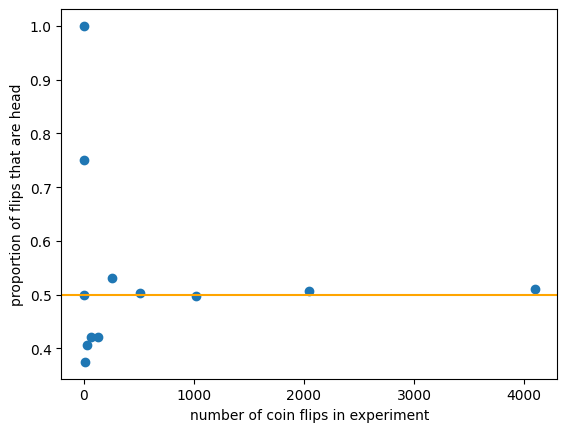

In [7]:
fig,ax = plt.subplots()

plt.xlabel('number of coin flips in experiment')
plt.ylabel('proportion of flips that are head')

plt.axhline(0.5,color='orange')
_ = ax.scatter(ns,proportion_head)

##**Statistics**

The field of statistics applies probability theory to make inference with a quantifiable degree of confidence

In [8]:
n_exp = 1000
head_count = np.random.binomial(5,0.5,n_exp)

we can plot the results of our experiments to create a probability distribution

In [9]:
heads,event_count = np.unique(head_count,return_counts=True)


In [10]:
heads

array([0, 1, 2, 3, 4, 5])

In [11]:
event_count

array([ 33, 181, 285, 313, 160,  28])

In [12]:
event_prob = event_count/n_exp

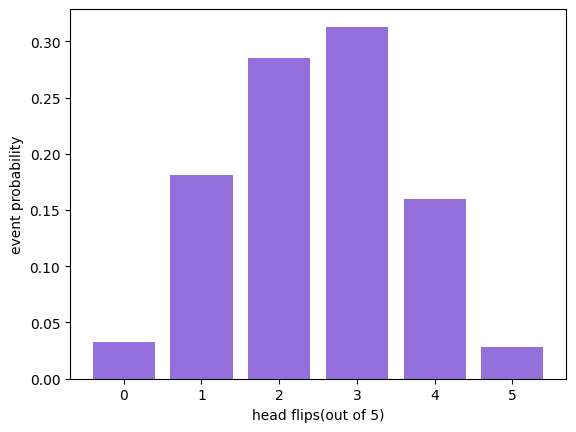

In [13]:
plt.bar(heads,event_prob,color='mediumpurple')
plt.xlabel("head flips(out of 5)")
_ = plt.ylabel('event probability')

##**Expected Value**

In [14]:
from math import factorial

In [15]:
def coinflip_prob(n,k):
  n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
  return n_choose_k/2**n

In [16]:
coinflip_prob(5,0)

0.03125

In [17]:
P = [coinflip_prob(5,x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [18]:
E = sum([P[x]*x for x in range(6)])
E

2.5

In [19]:
coinflip_prob(1,1)

0.5

In [20]:
x = st.skewnorm.rvs(0,size=1000)  #first argument is skewness. 0 means no skew


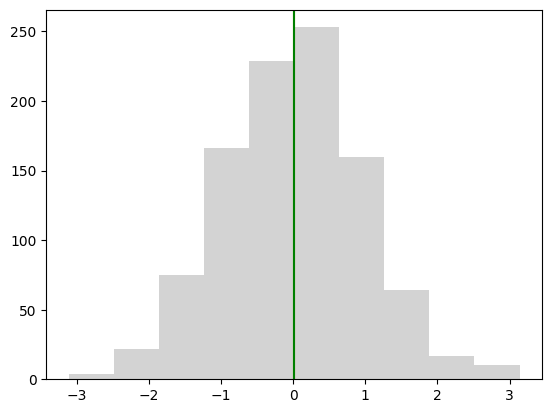

In [21]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##mode typically applies to PMFs, but this is PDFs

skewed disribution

In [22]:
x = st.skewnorm.rvs(10,size=1000)


In [23]:
x

array([ 5.53931525e-01,  1.75589950e+00,  4.56687784e-01,  1.98529279e-01,
        4.47570325e-02,  2.52043572e+00,  2.26939879e-01,  9.83204552e-01,
        1.83826154e-01,  1.71632461e+00,  7.67456010e-02,  1.02479525e+00,
        9.76019874e-01,  4.66135530e-01,  2.15079461e-01,  5.90593068e-01,
        1.64499700e+00,  3.09929934e-01,  1.69764012e+00,  6.31690521e-01,
        4.41582588e-01,  3.54591705e-01,  3.52272349e-01,  2.03592135e+00,
        3.17290793e-01,  8.67759442e-01,  5.31215395e-02,  1.38005663e+00,
        1.18823332e-01,  1.81223865e+00,  1.12367001e+00,  1.31822325e-02,
        1.06432997e+00,  3.16835972e-01,  1.71556751e+00,  9.72445560e-01,
        1.65822702e+00,  4.14224603e-01,  3.38707083e-01,  3.37908633e-01,
        2.01783787e+00,  1.65567788e+00,  2.11144470e+00,  1.89132670e-01,
        2.33029923e-01,  1.57974239e+00,  1.56700783e+00,  1.29847763e+00,
        3.75779426e-01,  1.00944489e+00,  4.77399600e-01,  8.79171460e-01,
        6.19778151e-01,  

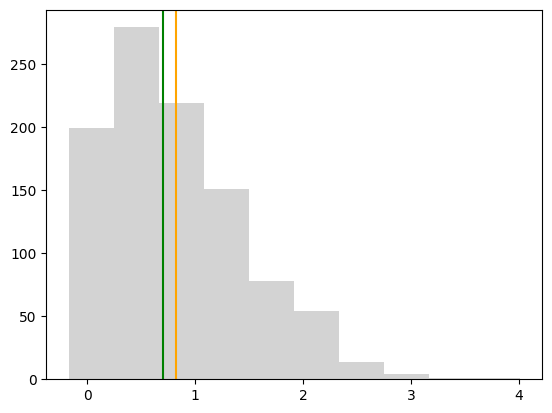

In [24]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##Quantiles

### The median, which divides a distribution in two at its midpoint, is most well known example of quantile

In [25]:
np.median(x)

0.6987365121323832

In [26]:
np.quantile(x,0.5)

0.6987365121323832

##Percentile
### Percentiles divide the distribution at any point outof one hundred. eg if we'd like to identify a threshold of top 5% of a distribution, we cut it at the 95% percentile.

In [27]:
p = np.percentile(x,[95,99])
p

array([2.06249928, 2.51830108])

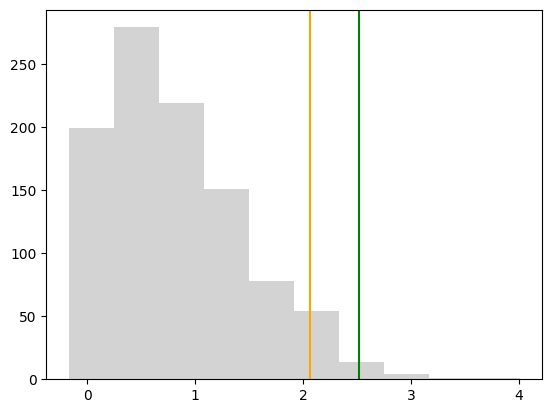

In [28]:
fig,ax = plt.subplots()
plt.axvline(x=p[0],color='orange')
plt.axvline(x=p[1],color='green')

_ = plt.hist(x,color='lightgray')

In [29]:
np.quantile(x,[.95,.99])

array([2.06249928, 2.51830108])

## Quartiles
### Quartiles as the name suggests are the quantiles that divide distribution into quarters by splitting them at 25th, median 50th, 75th percentile

In [30]:
q = np.percentile(x,[25,50,75])
q

array([0.32494046, 0.69873651, 1.19431522])

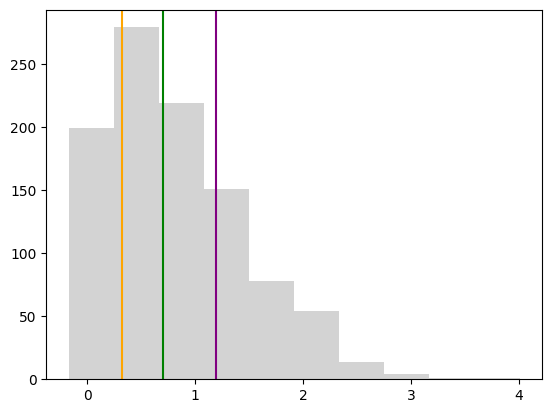

In [31]:
fig,ax = plt.subplots()
plt.axvline(q[0],color='orange')
plt.axvline(q[1],color='green')
plt.axvline(q[2], color='purple')

_ = ax.hist(x,color='lightgray')

##Deciles
### deciles divide the distribution into ten evenly-sized segments

In [32]:
d = np.percentile(x,range(10,100,10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

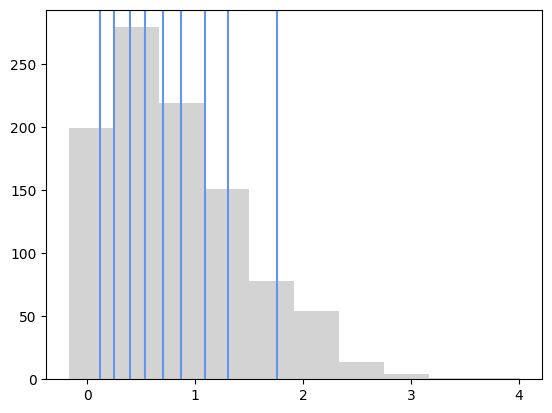

In [33]:
fig,ax = plt.subplots()
[plt.axvline(i, color='cornflowerblue') for i in d]
_ = plt.hist(x,color='lightgray')

##**The Box and Whiskers plot**

In [34]:
sns.set(style='whitegrid')

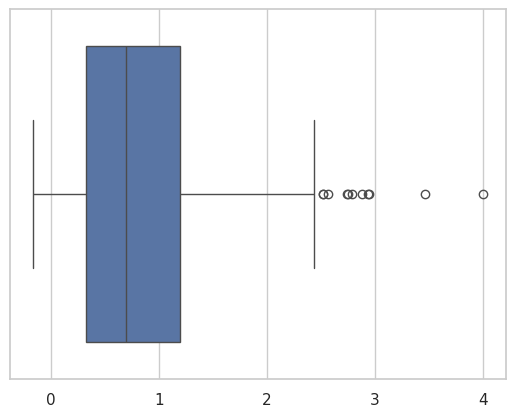

In [35]:
_ = sns.boxplot(x=x)

###Box edges and the median are determined by teh quartiles

In [36]:
q

array([0.32494046, 0.69873651, 1.19431522])

###Box edges define the inter-quartiles range IQR

In [37]:
iqr = 1.194-0.325

Whisker lengths are determined by furthest data points within 1.5 X IQR of the box edges.

### In this case, the lower whisker could stretch as far down (to the left) as:

In [38]:
0.325 - 1.5*iqr

-0.9785000000000001

### The lowest value is inside of that so whisker is plotted where that lowest value is:

In [39]:
np.min(x)

-0.17083838831568182

### The upper whisker could stretch as far up (to the right):

In [40]:
1.194  + 1.5*iqr

2.4975

In [41]:
np.max(x)

4.0064186272069575

## There are several values beyond that threshold in teh distribution. those are called outliers and are plotted individually:

In [42]:
x.sort()

In [43]:
x[-15:]

array([2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

## Useful for examining distributions on their own, box-and-whisker plot are hlpful for comparing the distribution

In [44]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


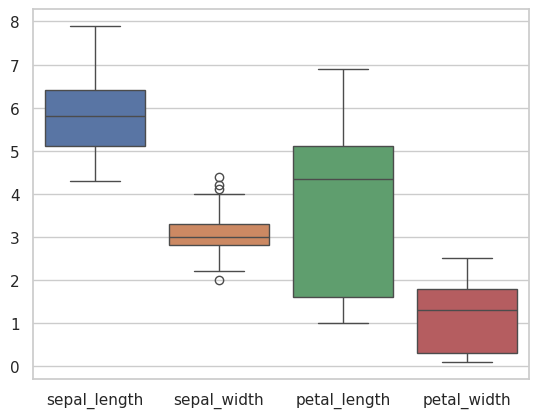

In [45]:
_ = sns.boxplot(data=iris)

In [46]:
tips = sns.load_dataset('tips')


In [47]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


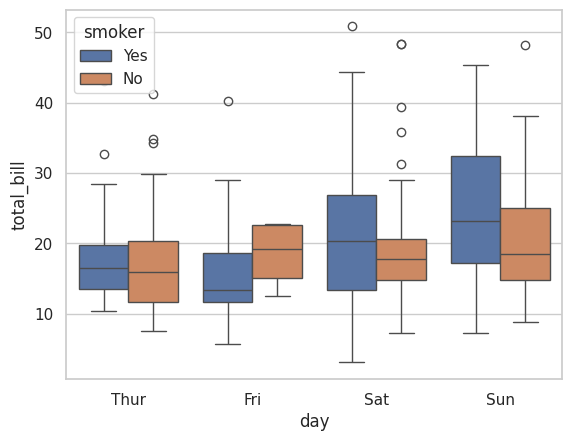

In [48]:
_ = sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips)

##**Measure of Dispersion**

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are:

* Variance,
* Standard deviation, and
* Standard error.

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [49]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [50]:
squared_differences = [(x_i - xbar)**2  for x_i in x]


In [51]:
squared_differences[:10]

[0.9856434536454379,
 0.9170226052916489,
 0.8965181282231266,
 0.8883307031718269,
 0.8733501430824243,
 0.8562478309191935,
 0.8319771034452769,
 0.8310929040089835,
 0.7863402041234238,
 0.7766155393407362]

In [52]:
sigma_sq = sum(squared_differences)/len(x)
sigma_sq

0.39813585982250543

In [53]:
np.var(x)

0.3981358598225057

##Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [54]:
sigma=  sigma_sq **(1/2)
sigma

0.6309800787841923

In [55]:
np.std(x)

0.6309800787841925

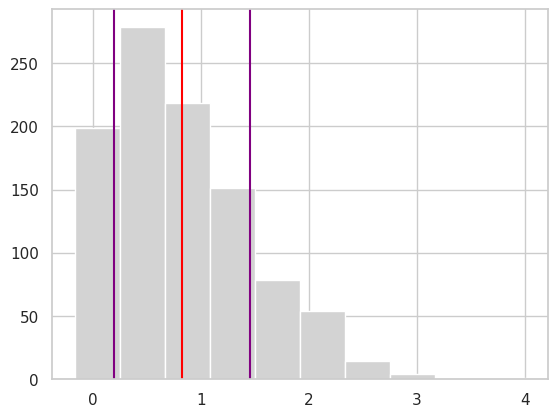

In [56]:
fig,ax = plt.subplots()

plt.axvline(x = xbar,color='red')
plt.axvline(x=xbar+sigma,color='purple')
plt.axvline(x=xbar-sigma,color='purple')
_ = plt.hist(x,color='lightgray')

##Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [57]:
sigma/(len(x)**(1/2))

0.019953342071505353

In [58]:
st.sem(x)  ## defaults to 1 degree of freedom  (n-1)

0.01996332623128527

In [59]:
st.sem(x,ddof=0)

0.01995334207150536

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

##**Measure of Covariance**

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [60]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
type(iris)

pandas.core.frame.DataFrame

In [62]:
x = iris.sepal_length
y = iris.petal_length

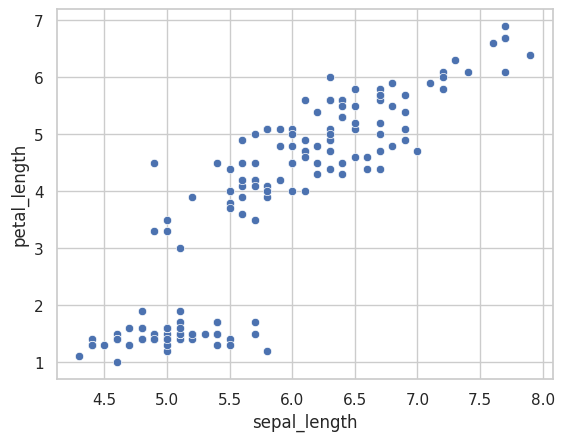

In [63]:
_ = sns.scatterplot(x=x,y=y)

In [64]:
n = len(x)
n

150

In [65]:
xbar = sum(x)/n
ybar = sum(y)/n

In [66]:
cov = []
for nm in range(n):
  cov.append((y[nm]-ybar)*(x[nm]-xbar))

In [67]:
covariance = sum(cov)/n
covariance

1.2658199999999995

## The Numpy cov() method returns covariance matrix, 2 x 2, bcz x and y together describes a 2d space:

In [68]:
np.cov(x,y,ddof=0)

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

### The diagonal elemnts,,, represent the variance of x and y respectively

In [69]:
np.var(x)

0.6811222222222223

In [70]:
np.var(y)

3.0955026666666665

If covariance is positive it means there is a directly proportional relation bw them. if its negative, it means they are inversely proportional.
### the less related they are, the closer their variance is to zero

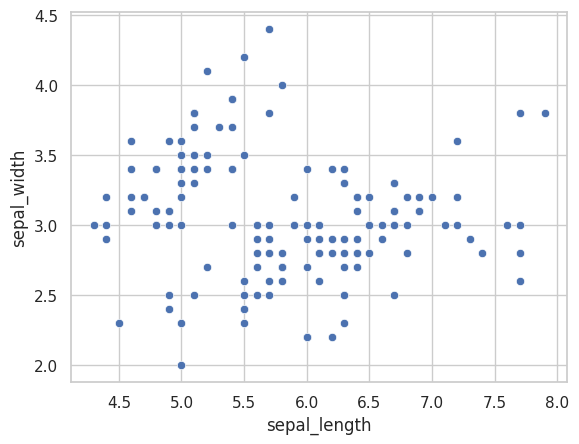

In [71]:
_ = sns.scatterplot(x=iris.sepal_length,y= iris.sepal_width)

In [72]:
np.cov(iris.sepal_length, iris.sepal_width)

array([[ 0.68569351, -0.042434  ],
       [-0.042434  ,  0.18997942]])

##**Corelation**

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [73]:
covar = -0.0424
sigma_x = 0.68569
sigma_y = 0.18998

In [74]:
xvar = sigma_x**(1/2)
yvar = sigma_y **(1/2)

In [75]:
covar/(xvar*yvar)

-0.1174756906641919

In [76]:
st.pearsonr(iris.sepal_length,iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

In [77]:
st.pearsonr(iris.sepal_length,iris.petal_length)[0]

0.8717537758865831

The strongest correlation possible is 1

### N.B
Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out to zero.

#**Distributions in ML**

##**Uniform**

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain.

In [80]:
u = np.random.uniform(size=100000)
sns.set_style('ticks')


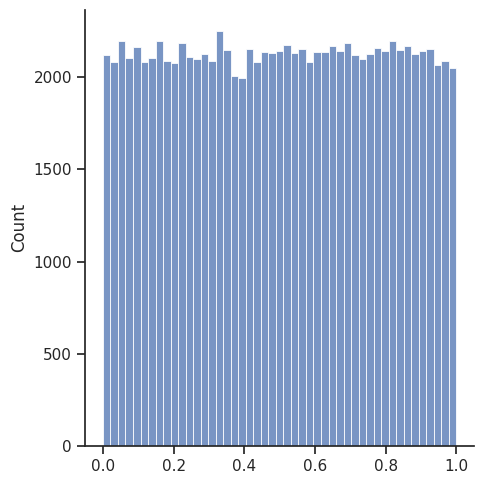

In [81]:
_ = sns.displot(u)

##**Guassian**

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**:

In [82]:
x = np.random.normal(size=10000)

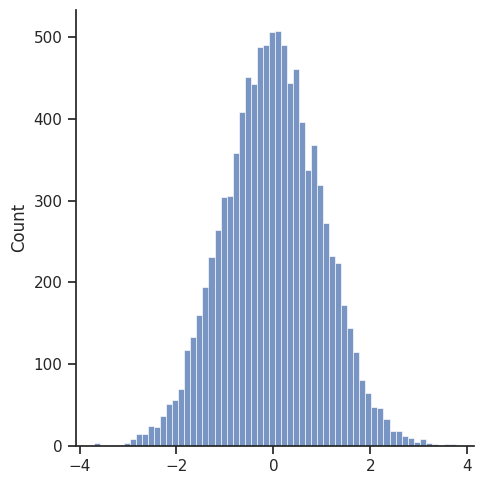

In [83]:
_ = sns.displot(x)

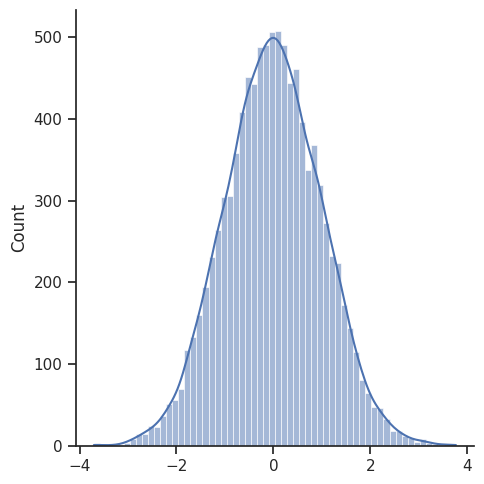

In [84]:
_ = sns.displot(x,kde=True)

When the normal distribution has a mean of zero and standard deviation of 1, as it does by default with Numpy normal() method.....

In [85]:
np.mean(x)

-0.0070174286891629915

In [86]:
np.std(x)

0.9970268877387939

...... it is a **Standard normal distribution** (aka standard guassian distribution) Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

Real-world examples include:

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In [87]:
n_exp = 10000
heads_count = [np.random.binomial(100,0.5) for i in range(n_exp)]
heads_count

[43,
 54,
 46,
 58,
 58,
 58,
 42,
 47,
 44,
 43,
 48,
 45,
 53,
 55,
 56,
 40,
 53,
 49,
 58,
 52,
 48,
 49,
 50,
 44,
 48,
 44,
 60,
 48,
 46,
 53,
 37,
 49,
 46,
 45,
 53,
 47,
 50,
 44,
 54,
 53,
 41,
 53,
 52,
 48,
 58,
 55,
 51,
 59,
 58,
 41,
 50,
 53,
 48,
 52,
 41,
 55,
 47,
 56,
 57,
 43,
 55,
 44,
 53,
 40,
 44,
 47,
 53,
 54,
 49,
 54,
 53,
 40,
 58,
 47,
 43,
 52,
 47,
 51,
 49,
 54,
 55,
 48,
 55,
 56,
 49,
 49,
 45,
 56,
 61,
 58,
 49,
 54,
 47,
 46,
 54,
 48,
 49,
 52,
 48,
 61,
 51,
 52,
 52,
 51,
 52,
 48,
 48,
 40,
 51,
 49,
 47,
 43,
 50,
 52,
 56,
 55,
 53,
 49,
 52,
 51,
 54,
 54,
 42,
 50,
 39,
 49,
 51,
 47,
 54,
 53,
 49,
 49,
 55,
 51,
 53,
 50,
 50,
 45,
 57,
 57,
 54,
 49,
 57,
 48,
 52,
 49,
 56,
 58,
 50,
 52,
 50,
 45,
 49,
 43,
 48,
 53,
 52,
 45,
 47,
 50,
 54,
 44,
 53,
 51,
 51,
 50,
 50,
 47,
 56,
 56,
 44,
 54,
 46,
 56,
 51,
 48,
 41,
 54,
 49,
 55,
 42,
 46,
 44,
 45,
 43,
 63,
 45,
 49,
 45,
 48,
 48,
 54,
 57,
 55,
 50,
 51,
 47,
 61,
 51,
 53,


In [89]:
heads, event_count = np.unique(heads_count,return_counts=True)
heads,event_count

(array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68]),
 array([  4,   2,   7,  20,  31,  38,  72, 102, 172, 213, 305, 359, 495,
        570, 690, 747, 781, 777, 731, 756, 654, 594, 521, 369, 313, 214,
        169, 115,  74,  54,  26,  10,   4,   5,   4,   2]))

In [90]:
event_probab = event_count/n_exp
event_probab

array([0.0004, 0.0002, 0.0007, 0.002 , 0.0031, 0.0038, 0.0072, 0.0102,
       0.0172, 0.0213, 0.0305, 0.0359, 0.0495, 0.057 , 0.069 , 0.0747,
       0.0781, 0.0777, 0.0731, 0.0756, 0.0654, 0.0594, 0.0521, 0.0369,
       0.0313, 0.0214, 0.0169, 0.0115, 0.0074, 0.0054, 0.0026, 0.001 ,
       0.0004, 0.0005, 0.0004, 0.0002])

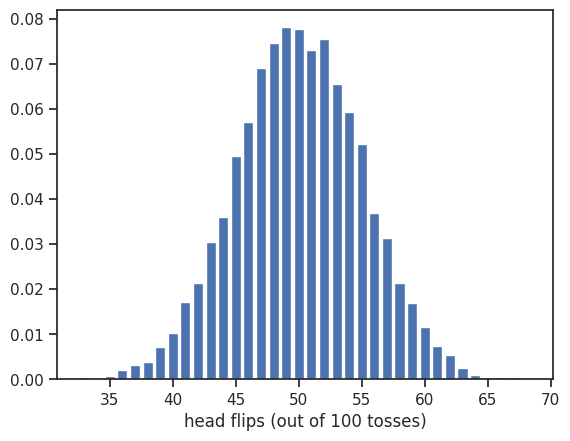

In [91]:
plt.bar(heads,event_probab)
_ = plt.xlabel("head flips (out of 100 tosses)")

In [92]:
np.mean(heads)


50.5

In [93]:
np.std(heads)

10.388294694831615